In [1]:
pip install pdfkit

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pdfkit as pdf




In [3]:
df = pd.read_csv("C:/Users/phili/Desktop/Most-Recent-Cohorts-All-Data-Elements (2).csv", delimiter = ',')
df.info()

C:\Users\phili\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1657,1666,1669,1674,1683,1688,1689,1690,1691,1692,1697,1700,1703,1704,1705,1706,1707,1726,1727,1728,1729,1815,1817,1823,1830,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(617), int64(14), object(1346)
memory usage: 107.3+ MB


In [4]:
Column_Rename = df.rename(columns = {  "UNITID":"University ID","CIP14BACHL":"Degree in Engineering","CIP27BACHL":"Degree in Math","CIP11BACHL":"Degree in Computer Science",
                           "CIP41BACHL":"Degree in Science and Tech","REGION":"Region","FEMALE":"Share of Female","UGDS":"Enrollment of UnderGrad","UG":
                           "UnderGrad Population","MN_EARN_WNE_INC1_P6":"Mean Earning After 6 yrs of Grad (0-30k)",
                           "MN_EARN_WNE_INC2_P6":"Mean Earning After 6 yrs of Grad(30-75k)","MN_EARN_WNE_INC3_P6":
                           "Mean Earning After 6 yrs of Grad(75k +)","MN_EARN_WNE_INC1_P8":"Mean Earning After 10 yrs of Grad (0-30k)",
                           "MN_EARN_WNE_INC2_P8":"Mean Earning After 6 yrs of Grad(30-75k)","MN_EARN_WNE_INC3_P8":"Mean Earning After 6 yrs of Grad(75k +)",
                           "MN_EARN_WNE_INC1_P10":"Mean Earning After 10 yrs of Grad (0-30k)","MN_EARN_WNE_INC2_P10":"Mean Earning After 10 yrs of Grad(30-75k)",
                           "MN_EARN_WNE_INC3_P10":"Mean Earning After 10 yrs of Grad(75k +)", })
Column_Rename .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1977 entries, University ID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(617), int64(14), object(1346)
memory usage: 107.3+ MB


In [5]:
Data_df = Column_Rename[['University ID','Degree in Engineering','Degree in Math','Degree in Computer Science','Degree in Science and Tech','Region','Share of Female','Enrollment of UnderGrad',
'Mean Earning After 6 yrs of Grad (0-30k)','Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)','Mean Earning After 10 yrs of Grad (0-30k)'
,'Mean Earning After 10 yrs of Grad(30-75k)',
'Mean Earning After 10 yrs of Grad(75k +)']]

Data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 14 columns):
University ID                                7112 non-null int64
Degree in Engineering                        6664 non-null float64
Degree in Math                               6664 non-null float64
Degree in Computer Science                   6664 non-null float64
Degree in Science and Tech                   6664 non-null float64
Region                                       7112 non-null int64
Share of Female                              6741 non-null object
Enrollment of UnderGrad                      6364 non-null float64
Mean Earning After 6 yrs of Grad (0-30k)     5887 non-null object
Mean Earning After 6 yrs of Grad(30-75k)     5887 non-null object
Mean Earning After 6 yrs of Grad(75k +)      5887 non-null object
Mean Earning After 10 yrs of Grad (0-30k)    5887 non-null object
Mean Earning After 10 yrs of Grad(30-75k)    5887 non-null object
Mean Earning After 10 yrs of Gra

In [6]:
columns_list = list(Data_df.columns)
columns_list

['University ID',
 'Degree in Engineering',
 'Degree in Math',
 'Degree in Computer Science',
 'Degree in Science and Tech',
 'Region',
 'Share of Female',
 'Enrollment of UnderGrad',
 'Mean Earning After 6 yrs of Grad (0-30k)',
 'Mean Earning After 6 yrs of Grad(30-75k)',
 'Mean Earning After 6 yrs of Grad(75k +)',
 'Mean Earning After 10 yrs of Grad (0-30k)',
 'Mean Earning After 10 yrs of Grad(30-75k)',
 'Mean Earning After 10 yrs of Grad(75k +)']

In [7]:
row_indices_tofilter = []
for column in columns_list:
    row_indices_tofilter.append(Data_df[Data_df[column].astype(str).str.strip()=="PrivacySuppressed"].index.tolist())
#     df[df['BoolCol'] == True].index.tolist()

new_list = []
for i in row_indices_tofilter:
    for j in i:
        new_list.append(j)
len(new_list)
filtering_set = set(new_list)
len(filtering_set)
filtering_list = list(filtering_set)
filtering_list
Data_filtered_df=Data_df.drop(filtering_list)
Data_filtered_df
# Data_filtered_df
Data_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3811 entries, 0 to 7111
Data columns (total 14 columns):
University ID                                3811 non-null int64
Degree in Engineering                        3455 non-null float64
Degree in Math                               3455 non-null float64
Degree in Computer Science                   3455 non-null float64
Degree in Science and Tech                   3455 non-null float64
Region                                       3811 non-null int64
Share of Female                              3481 non-null object
Enrollment of UnderGrad                      3278 non-null float64
Mean Earning After 6 yrs of Grad (0-30k)     2977 non-null object
Mean Earning After 6 yrs of Grad(30-75k)     2977 non-null object
Mean Earning After 6 yrs of Grad(75k +)      2977 non-null object
Mean Earning After 10 yrs of Grad (0-30k)    2977 non-null object
Mean Earning After 10 yrs of Grad(30-75k)    2977 non-null object
Mean Earning After 10 yrs of Gra

In [8]:
Data_filtered_df.head()

,University ID,Degree in Engineering,Degree in Math,Degree in Computer Science,Degree in Science and Tech,Region,Share of Female,Enrollment of UnderGrad,Mean Earning After 6 yrs of Grad (0-30k),Mean Earning After 6 yrs of Grad(30-75k),Mean Earning After 6 yrs of Grad(75k +),Mean Earning After 10 yrs of Grad (0-30k),Mean Earning After 10 yrs of Grad(30-75k),Mean Earning After 10 yrs of Grad(75k +)
0,100654,1.0,1.0,1.0,0.0,5,0.564030132,4824.0,27200,29100,30800,33000,37300,39500
1,100663,1.0,1.0,1.0,0.0,5,0.63909074,12866.0,38600,39400,40500,47000,49500,49300
3,100706,1.0,1.0,1.0,0.0,5,0.476349937,6917.0,36300,44200,41500,47000,55500,55100
4,100724,1.0,1.0,1.0,0.0,5,0.61341853,4189.0,23500,25400,27700,29000,32500,34300
5,100751,2.0,1.0,1.0,0.0,5,0.615252417,32387.0,42900,41400,42700,45500,51600,55800


In [9]:
Data_no_Nan=Data_filtered_df.dropna()

Data_no_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 0 to 6352
Data columns (total 14 columns):
University ID                                2742 non-null int64
Degree in Engineering                        2742 non-null float64
Degree in Math                               2742 non-null float64
Degree in Computer Science                   2742 non-null float64
Degree in Science and Tech                   2742 non-null float64
Region                                       2742 non-null int64
Share of Female                              2742 non-null object
Enrollment of UnderGrad                      2742 non-null float64
Mean Earning After 6 yrs of Grad (0-30k)     2742 non-null object
Mean Earning After 6 yrs of Grad(30-75k)     2742 non-null object
Mean Earning After 6 yrs of Grad(75k +)      2742 non-null object
Mean Earning After 10 yrs of Grad (0-30k)    2742 non-null object
Mean Earning After 10 yrs of Grad(30-75k)    2742 non-null object
Mean Earning After 10 yrs of Gra

In [10]:
Data_no_Nan[[
'Mean Earning After 6 yrs of Grad (0-30k)','Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)','Mean Earning After 10 yrs of Grad (0-30k)'
,'Mean Earning After 10 yrs of Grad(30-75k)',
'Mean Earning After 10 yrs of Grad(75k +)']] = Data_no_Nan[[
'Mean Earning After 6 yrs of Grad (0-30k)','Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)','Mean Earning After 10 yrs of Grad (0-30k)'
,'Mean Earning After 10 yrs of Grad(30-75k)',
'Mean Earning After 10 yrs of Grad(75k +)']].apply(pd.to_numeric)
Data_no_Nan.info()

C:\Users\phili\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 0 to 6352
Data columns (total 14 columns):
University ID                                2742 non-null int64
Degree in Engineering                        2742 non-null float64
Degree in Math                               2742 non-null float64
Degree in Computer Science                   2742 non-null float64
Degree in Science and Tech                   2742 non-null float64
Region                                       2742 non-null int64
Share of Female                              2742 non-null object
Enrollment of UnderGrad                      2742 non-null float64
Mean Earning After 6 yrs of Grad (0-30k)     2742 non-null int64
Mean Earning After 6 yrs of Grad(30-75k)     2742 non-null int64
Mean Earning After 6 yrs of Grad(75k +)      2742 non-null int64
Mean Earning After 10 yrs of Grad (0-30k)    2742 non-null int64
Mean Earning After 10 yrs of Grad(30-75k)    2742 non-null int64
Mean Earning After 10 yrs of Grad(75k

In [11]:
Data_no_Nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 0 to 6352
Data columns (total 14 columns):
University ID                                2742 non-null int64
Degree in Engineering                        2742 non-null float64
Degree in Math                               2742 non-null float64
Degree in Computer Science                   2742 non-null float64
Degree in Science and Tech                   2742 non-null float64
Region                                       2742 non-null int64
Share of Female                              2742 non-null object
Enrollment of UnderGrad                      2742 non-null float64
Mean Earning After 6 yrs of Grad (0-30k)     2742 non-null int64
Mean Earning After 6 yrs of Grad(30-75k)     2742 non-null int64
Mean Earning After 6 yrs of Grad(75k +)      2742 non-null int64
Mean Earning After 10 yrs of Grad (0-30k)    2742 non-null int64
Mean Earning After 10 yrs of Grad(30-75k)    2742 non-null int64
Mean Earning After 10 yrs of Grad(75k

In [12]:
Degree_grouping = Data_no_Nan
Degree_grouping['Degree in Engineering'].replace([1.0, 2.0], ['Degree in Engineering', 'Degree in Engineering'], inplace=True)
Degree_grouping['Degree in Math'].replace([1.0, 2.0], ['Degree in Math', 'B.S. Math'], inplace=True)
Degree_grouping['Degree in Computer Science'].replace([1.0, 2.0], ['Degree in Computer Science', 'Degree in Computer Science'], inplace=True)
Degree_grouping['Degree in Science and Tech'].replace([1.0, 2.0], ['Degree in Science and Tech', 'Degree in Science and Tech'], inplace=True)


Degree_grouping.head()

C:\Users\phili\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,University ID,Degree in Engineering,Degree in Math,Degree in Computer Science,Degree in Science and Tech,Region,Share of Female,Enrollment of UnderGrad,Mean Earning After 6 yrs of Grad (0-30k),Mean Earning After 6 yrs of Grad(30-75k),Mean Earning After 6 yrs of Grad(75k +),Mean Earning After 10 yrs of Grad (0-30k),Mean Earning After 10 yrs of Grad(30-75k),Mean Earning After 10 yrs of Grad(75k +)
0,100654,Degree in Engineering,Degree in Math,Degree in Computer Science,0,5,0.564030132,4824.0,27200,29100,30800,33000,37300,39500
1,100663,Degree in Engineering,Degree in Math,Degree in Computer Science,0,5,0.63909074,12866.0,38600,39400,40500,47000,49500,49300
3,100706,Degree in Engineering,Degree in Math,Degree in Computer Science,0,5,0.476349937,6917.0,36300,44200,41500,47000,55500,55100
4,100724,Degree in Engineering,Degree in Math,Degree in Computer Science,0,5,0.61341853,4189.0,23500,25400,27700,29000,32500,34300
5,100751,Degree in Engineering,Degree in Math,Degree in Computer Science,0,5,0.615252417,32387.0,42900,41400,42700,45500,51600,55800


In [13]:
Eng_Earning = Degree_grouping.groupby('Degree in Engineering')['Mean Earning After 6 yrs of Grad (0-30k)', 'Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)'].mean()
Eng_Earning.drop(Eng_Earning.index[0], inplace=True)
Math_Earning = Degree_grouping.groupby('Degree in Math')['Mean Earning After 6 yrs of Grad (0-30k)', 'Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)'].mean()
Math_Earning.drop(Math_Earning.index[0], inplace=True)
CompSci_Earning = Degree_grouping.groupby('Degree in Computer Science')['Mean Earning After 6 yrs of Grad (0-30k)', 'Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)'].mean()
CompSci_Earning.drop(CompSci_Earning.index[0], inplace=True)
Science_Earning = Degree_grouping.groupby('Degree in Science and Tech')['Mean Earning After 6 yrs of Grad (0-30k)', 'Mean Earning After 6 yrs of Grad(30-75k)','Mean Earning After 6 yrs of Grad(75k +)'].mean()
Science_Earning.drop(Science_Earning.index[0], inplace=True)


Combined_df=[Eng_Earning,Science_Earning,Math_Earning,CompSci_Earning]

Combined_df= pd.concat(Combined_df)
Combined_df = Combined_df.round(2)
Combined_df


,Mean Earning After 6 yrs of Grad (0-30k),Mean Earning After 6 yrs of Grad(30-75k),Mean Earning After 6 yrs of Grad(75k +)
Degree in Engineering,40093.29,42360.78,45060.42
Degree in Science and Tech,35792.86,39010.71,41432.14
B.S. Math,33672.73,41018.18,44436.36
Degree in Math,36893.37,39723.71,42347.14
Degree in Computer Science,34848.73,39330.19,43471.90


In [14]:
Eng_Earning = Degree_grouping.groupby('Degree in Engineering')['Mean Earning After 10 yrs of Grad (0-30k)', 'Mean Earning After 10 yrs of Grad(30-75k)','Mean Earning After 10 yrs of Grad(75k +)'].mean()
Eng_Earning.drop(Eng_Earning.index[0], inplace=True)
Math_Earning = Degree_grouping.groupby('Degree in Math')['Mean Earning After 10 yrs of Grad (0-30k)', 'Mean Earning After 10 yrs of Grad(30-75k)','Mean Earning After 10 yrs of Grad(75k +)'].mean()
Math_Earning.drop(Math_Earning.index[0], inplace=True)

CompSci_Earning = Degree_grouping.groupby('Degree in Computer Science')['Mean Earning After 10 yrs of Grad (0-30k)', 'Mean Earning After 10 yrs of Grad(30-75k)','Mean Earning After 10 yrs of Grad(75k +)'].mean()
CompSci_Earning.drop(CompSci_Earning.index[0], inplace=True)
Science_Earning = Degree_grouping.groupby('Degree in Science and Tech')['Mean Earning After 10 yrs of Grad (0-30k)', 'Mean Earning After 10 yrs of Grad(30-75k)','Mean Earning After 10 yrs of Grad(75k +)'].mean()
Science_Earning.drop(Science_Earning.index[0], inplace=True)


Combined_ten_df=[Eng_Earning,Science_Earning,Math_Earning,CompSci_Earning]

Combined_ten_df= pd.concat(Combined_ten_df)
Combined_ten_df = Combined_ten_df.round(2)
Combined_ten_df

,Mean Earning After 10 yrs of Grad (0-30k),Mean Earning After 10 yrs of Grad(30-75k),Mean Earning After 10 yrs of Grad(75k +)
Degree in Engineering,53274.20,54774.38,58733.75
Degree in Science and Tech,46260.71,48985.71,53328.57
B.S. Math,41377.27,47768.18,52972.73
Degree in Math,48002.36,50700.36,54456.22
Degree in Computer Science,45805.46,49891.26,55099.03


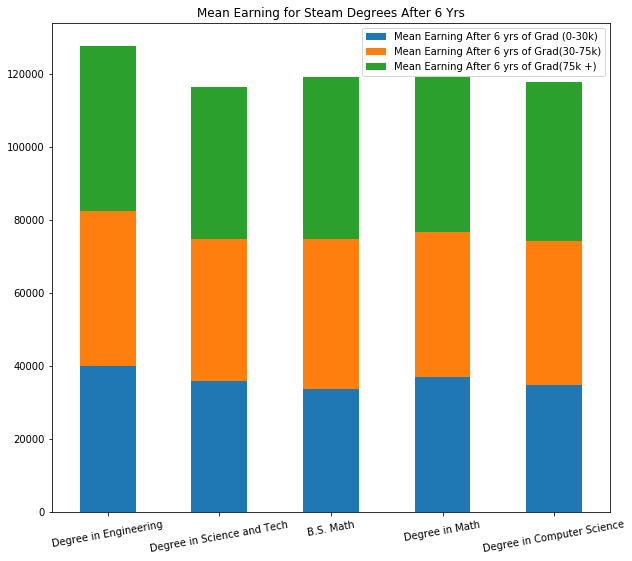

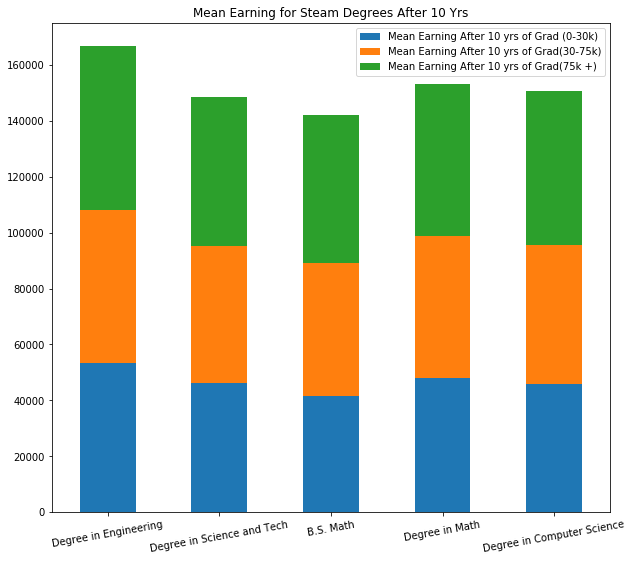

In [15]:
Combined_df.plot(kind='Bar',stacked = True,legend= True,figsize=(10,9),rot=10,title = "Mean Earning for Steam Degrees After 6 Yrs")

Combined_ten_df.plot(kind='Bar',stacked = True,legend= True,figsize=(10,9),rot=10,title = "Mean Earning for Steam Degrees After 10 Yrs")

plt.savefig("C:/Users/phili/Desktop/Graphfortenth.png")


In [16]:
Sixyr_Bachelor_Degree_Min = Combined_df.style.highlight_min(color='red')
Sixyr_Bachelor_Degree_Min


,Mean Earning After 6 yrs of Grad (0-30k),Mean Earning After 6 yrs of Grad(30-75k),Mean Earning After 6 yrs of Grad(75k +)
Degree in Engineering,40093.3,42360.8,45060.4
Degree in Science and Tech,35792.9,39010.7,41432.1
B.S. Math,33672.7,41018.2,44436.4
Degree in Math,36893.4,39723.7,42347.1
Degree in Computer Science,34848.7,39330.2,43471.9


In [17]:
Sixyr_Bachelor_Degree_Max = Combined_df.style.highlight_max(color='green')
Sixyr_Bachelor_Degree_Max

,Mean Earning After 6 yrs of Grad (0-30k),Mean Earning After 6 yrs of Grad(30-75k),Mean Earning After 6 yrs of Grad(75k +)
Degree in Engineering,40093.3,42360.8,45060.4
Degree in Science and Tech,35792.9,39010.7,41432.1
B.S. Math,33672.7,41018.2,44436.4
Degree in Math,36893.4,39723.7,42347.1
Degree in Computer Science,34848.7,39330.2,43471.9


In [18]:
Tenyr_Bachelor_Degree_Min = Combined_ten_df.style.highlight_min(color='red')
Tenyr_Bachelor_Degree_Min

,Mean Earning After 10 yrs of Grad (0-30k),Mean Earning After 10 yrs of Grad(30-75k),Mean Earning After 10 yrs of Grad(75k +)
Degree in Engineering,53274.2,54774.4,58733.8
Degree in Science and Tech,46260.7,48985.7,53328.6
B.S. Math,41377.3,47768.2,52972.7
Degree in Math,48002.4,50700.4,54456.2
Degree in Computer Science,45805.5,49891.3,55099


In [19]:

Tenyr_Bachelor_Degree_Max = Combined_ten_df.style.highlight_max(color='green')
Tenyr_Bachelor_Degree_Max

,Mean Earning After 10 yrs of Grad (0-30k),Mean Earning After 10 yrs of Grad(30-75k),Mean Earning After 10 yrs of Grad(75k +)
Degree in Engineering,53274.2,54774.4,58733.8
Degree in Science and Tech,46260.7,48985.7,53328.6
B.S. Math,41377.3,47768.2,52972.7
Degree in Math,48002.4,50700.4,54456.2
Degree in Computer Science,45805.5,49891.3,55099


In [20]:
Tenyr_Bachelor_Degree_Max.to_html('Tenyr_Bachelor_Degree_Max.html')
PdfFilename='Tenyr_Bachelor_Degree_Max.pdf'
pdf.from_file('test.html', PdfFilename)

AttributeError: 'Styler' object has no attribute 'to_html'